In [1]:
import numpy as np
import pandas as pd

In [2]:
#load csv file
train_data = pd.read_csv("train_E6oV3lV.csv")
test = pd.read_csv('test_tweets_anuFYb8.csv')
twitter_data =train_data
twitter_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
twitter_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

c:\users\sandhaya\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


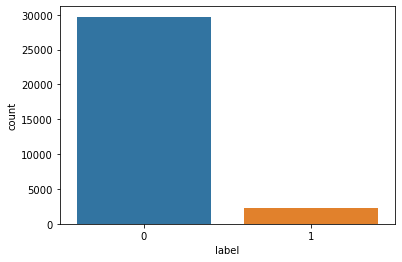

In [5]:
import seaborn as sns
ax=sns.countplot(twitter_data.label)

In [6]:
# removing usernames from tweet

twitter_data['new_tweet'] = twitter_data.tweet.str.replace('@user', '')
twitter_data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [7]:
#Removing Punctuations, Numbers, and Special Characters
twitter_data['new_tweet'] = twitter_data['new_tweet'].str.replace("[^a-zA-Z#]", " ")
twitter_data['new_tweet'] = twitter_data['new_tweet'].str.replace("#", "")
twitter_data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause the...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in u...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [9]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(twitter_data['new_tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('the', 10238),
 ('to', 9866),
 ('i', 7622),
 ('a', 6540),
 ('you', 5949),
 ('and', 4945),
 ('in', 4704),
 ('for', 4510),
 ('of', 4261),
 ('is', 4196)]

In [11]:
#tokenization
twitter_data['new_tweet'] = twitter_data['new_tweet'].apply(lambda x: x.split())
twitter_data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunctional, and, is, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,3,0,bihday your majesty,"[bihday, your, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguide, society, now, motivation]"


In [12]:
#stemmer
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

twitter_data['new_tweet']= twitter_data['new_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
twitter_data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[when, a, father, is, dysfunct, and, is, so, s..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thank, for, lyft, credit, i, can, t, use, cau..."
2,3,0,bihday your majesty,"[bihday, your, majesti]"
3,4,0,#model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,5,0,factsguide: society now #motivation,"[factsguid, societi, now, motiv]"


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sandhaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

In [15]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get']
stopwords.extend(newStopWords)

In [16]:
import string 

def process(text):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(text) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords]

In [17]:
twitter_data['new_tweet'] = twitter_data['new_tweet'].apply(process) 
twitter_data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[kid, run, selfish, father, drag, dysfunct]"
1,2,0,@user @user thanks for #lyft credit i can't us...,"[lyft, use, caus, van, credit, disapoint, offe..."
2,3,0,bihday your majesty,"[majesti, bihday]"
3,4,0,#model i love u take with u all the time in ...,"[take, model, love, time]"
4,5,0,factsguide: society now #motivation,"[motiv, societi, factsguid]"


In [19]:
def string (text):
    to_return=""
    for i in list(text):
        to_return += str(i) + " "
    to_return = to_return[:-1]
    
    return to_return
    
       
twitter_data['new_tweet'] = twitter_data['new_tweet'].apply(string)
twitter_data.head()

,id,label,tweet,new_tweet
0,1,0,@user when a father is dysfunctional and is s...,kid run selfish father drag dysfunct
1,2,0,@user @user thanks for #lyft credit i can't us...,lyft use caus van credit disapoint offer pdx g...
2,3,0,bihday your majesty,majesti bihday
3,4,0,#model i love u take with u all the time in ...,take model love time
4,5,0,factsguide: society now #motivation,motiv societi factsguid


In [21]:
#positive tweets
positive = [r for r in twitter_data['new_tweet'][twitter_data['label']==0]]
pos = ''.join(positive)

In [23]:
#negative tweets
negative = [r for r in twitter_data['new_tweet'][twitter_data['label']==1]]
neg = ''.join(negative)

In [24]:
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [26]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(twitter_data['tweet'][twitter_data['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(twitter_data['tweet'][twitter_data['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

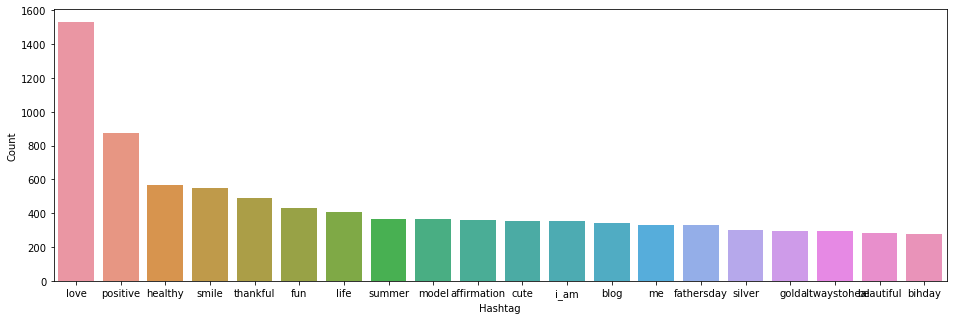

In [28]:
import nltk
import matplotlib.pyplot as plt
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

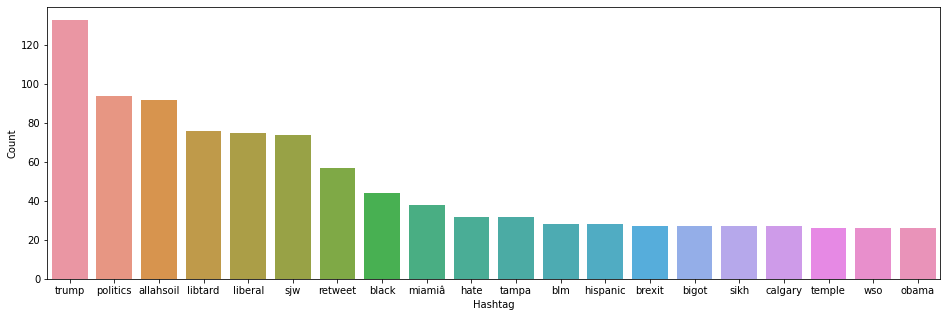

In [29]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [32]:
twitter_data.drop(["id","tweet" ],axis=1,inplace=True)
twitter_data.head()

,label,new_tweet
0,0,kid run selfish father drag dysfunct
1,0,lyft use caus van credit disapoint offer pdx g...
2,0,majesti bihday
3,0,take model love time
4,0,motiv societi factsguid


In [33]:
#Split data into training and testing sets 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(twitter_data["new_tweet"], 
                                                    twitter_data["label"], test_size = 0.2, random_state = 42)

print("training set :",x_train.shape,y_train.shape)
print("testing set :",x_test.shape,y_test.shape)

training set : (25569,) (25569,)
testing set : (6393,) (6393,)


In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

In [35]:
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

print(x_train_counts.shape)
print(x_train_tfidf.shape)

(25569, 27304)
(25569, 27304)


In [36]:
x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print(x_test_counts.shape)
print(x_test_tfidf.shape)

(6393, 27304)
(6393, 27304)


Model Building

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train_tfidf,y_train)

RandomForestClassifier(n_estimators=200)

In [38]:
predictions = model.predict(x_test_tfidf)

In [39]:
#Accuracy_score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)*100

96.245893946504

In [40]:
from sklearn.metrics import f1_score
#f1-score
f1_score(y_test,predictions)

0.67828418230563

In [41]:
predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)